<a href="https://colab.research.google.com/github/Inventrohyder/deep-learning-tutorial/blob/main/CIFAR_10_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.callbacks import History
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam

In [2]:
# load train and test dataset
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = cifar10.load_data()
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

In [3]:
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [4]:
def define_model() -> Model:
  """ This function defines the model. Most hyperparameters are located here, 
  although you can also consider data preparation to have hyperparameters. 
  Focus on modifying this part.
  """
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [5]:
# plot diagnostic learning curves
def summarize_diagnostics(history: History) -> None:
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 pyplot.savefig(filename + '_plot.png')
 pyplot.show()
 pyplot.close()

In [6]:
# run the test harness for evaluating a model
def run_test_harness(model: Model):
 # load dataset
 trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
 trainX, testX = prep_pixels(trainX, testX)

 # fit model
 history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY))
 # evaluate model
 _, acc = model.evaluate(testX, testY, verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)

Epoch 1/20
782/782 [==============================] - 12s 12ms/step - loss: 1.4940 - accuracy: 0.4568 - val_loss: 1.2798 - val_accuracy: 0.5498
Epoch 2/20
782/782 [==============================] - 9s 12ms/step - loss: 1.0836 - accuracy: 0.6210 - val_loss: 1.0161 - val_accuracy: 0.6416
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.8967 - accuracy: 0.6858 - val_loss: 0.8656 - val_accuracy: 0.6978
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.7697 - accuracy: 0.7317 - val_loss: 0.8149 - val_accuracy: 0.7185
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.6811 - accuracy: 0.7585 - val_loss: 0.8061 - val_accuracy: 0.7247
Epoch 6/20
782/782 [==============================] - 5s 7ms/step - loss: 0.6031 - accuracy: 0.7868 - val_loss: 0.7963 - val_accuracy: 0.7356
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.5423 - accuracy: 0.8098 - val_loss: 0.7846 - val_accuracy: 0.7406
Epo

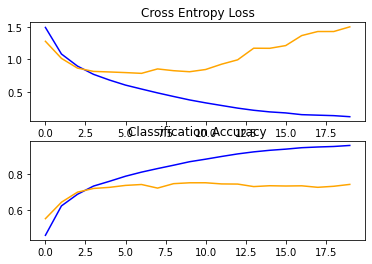

In [7]:
# entry point, run the test harness
run_test_harness(model = define_model())